In [49]:
from sklearn.datasets import load_iris
data = load_iris()

data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [52]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


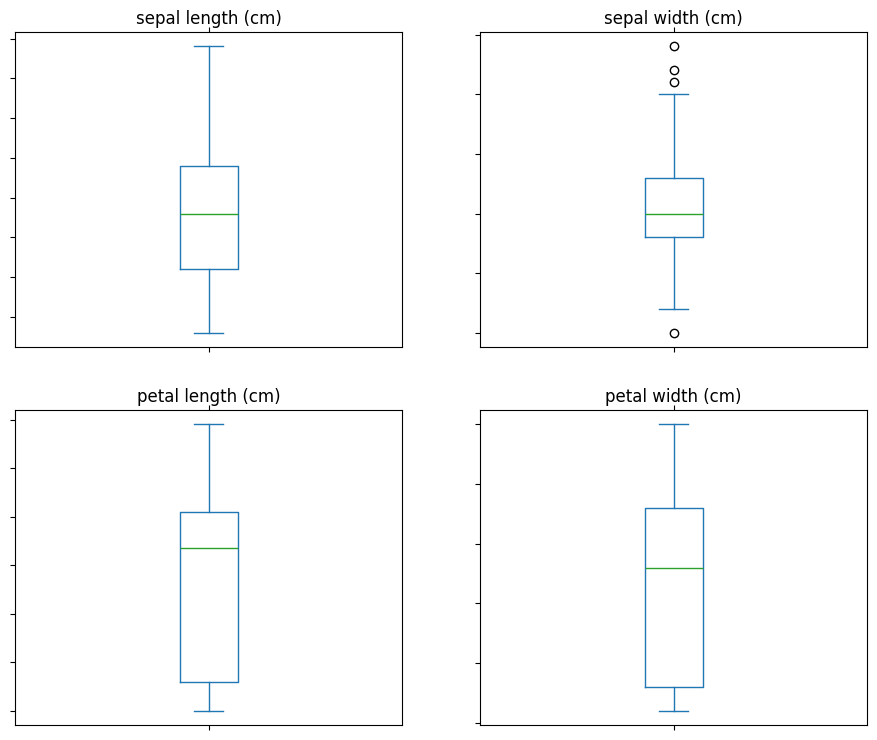

In [53]:
#Visualizar de estadisticas basicas y de valores atipicos 
def boxplot_iris(feature_names, dataset):
    """"""
    i = 1
    plt.figure(figsize=(11, 9))
    for col in feature_names:
        plt.subplot(2, 2, i)
        plt.axis('on')
        plt.tick_params(axis = 'both', left=True,
                        top=True, right=False,
                        bottom=True, labelleft=False, 
                        labeltop=False, labelright=False,
                        labelbottom=False            
        )
        dataset[col].plot(kind='box', subplots=True, sharex=False)
        plt.title(col)
        i += 1
    plt.show()
    
boxplot_iris(iris.columns[:], iris)

In [54]:
def histogram_iris(feature_names, dataset):
    """"""
    i = 1
    plt.figure(figsize=(11, 9))
    for col in feature_names:
        plt.subplot(2, 2, i )
        plt.axis('on')
        plt.tick_params(axis = 'both', left=True,
                        top=False, right=False,
                        bottom=True, labelleft=False, 
                        labeltop=False, labelright=False,
                        labelbottom=False            
        )
    dataset[col].hist()
    plt.title(col)
    i += 1
plt.show()



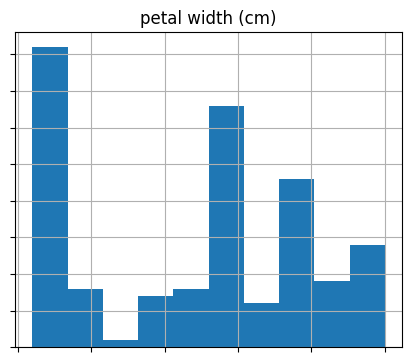

In [55]:
histogram_iris(iris.columns[:], iris)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = iris
y = data.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [58]:
model = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=None,
    random_state=42, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, class_weight=None
)

In [59]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
model.score(X_test, y_test)

0.98